#Licende-Plate Dataset

Datenset für das Training der OCR-Erkennung

In [1]:
from preprocessing import RandomRotatePreprocessor
from preprocessing import RandomGaussianNoisePreprocessor
import cv2
import matplotlib.pyplot as plt


##DatasetLoader

Lädt die vom DatasetGenerator erzeugten Trainings- und Testdaten

Vom DataSetGenerator erzeugtes Originalbild 
Das vom Web-Service erzeugte Originalbild wurde bereits in ein Graubild gewandelt und um den Faktor 0.3 verzleinert, dass es etwa 160 x 32 Pixel hat

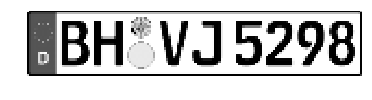

In [8]:
image = image = cv2.imread("D:/development/cv/ANPR-keras/data/validation/BH-VJ5298.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.show()

Das Größe wird auf exakt 160 x 32 gesetzt, da das OCR-Model mit dieser Input-Größe trainiert wurde




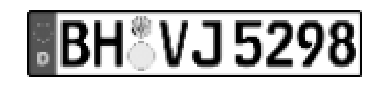

In [9]:
gray_image = cv2.resize(gray_image, (160, 32))
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.show()

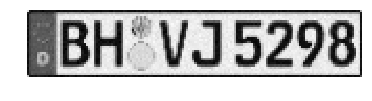

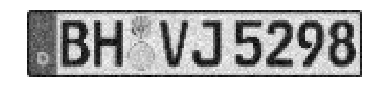

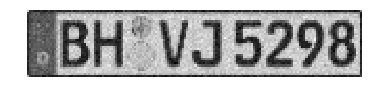

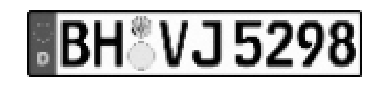

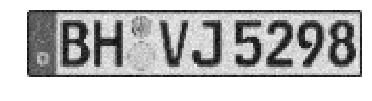

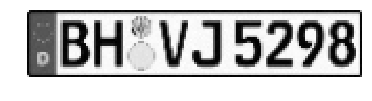

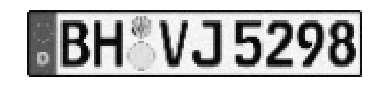

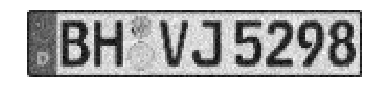

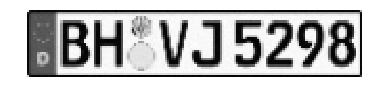

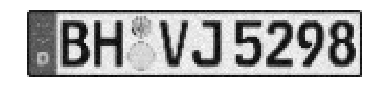

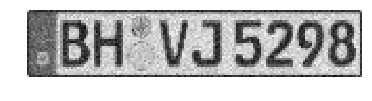

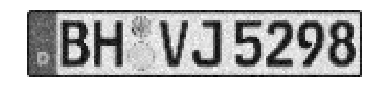

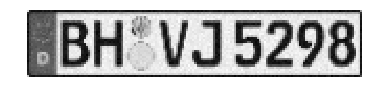

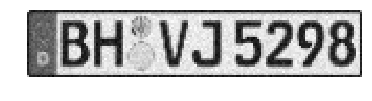

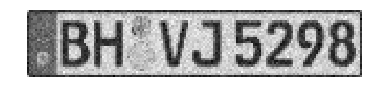

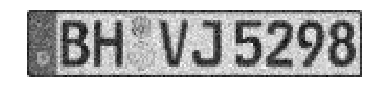

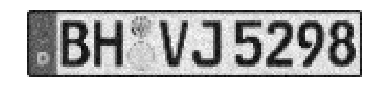

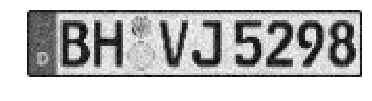

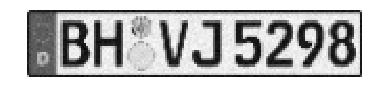

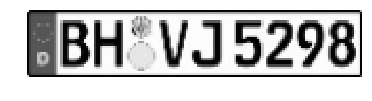

In [10]:
np = RandomGaussianNoisePreprocessor(25)

for i in range(20):
    image = np.preprocess(gray_image)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()

Da sich die Kamera nicht immer exakt hinter dem Nummernschild befindet, sonder leicht seitlich, sind die Nummernschilder meist leicht schräg...

Um das zu simulieren, werden die Bilder daher zufälling leicht rotiert

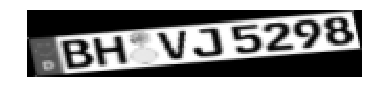

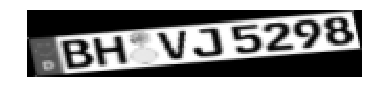

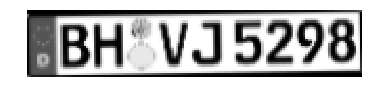

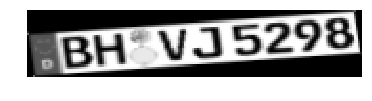

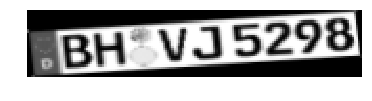

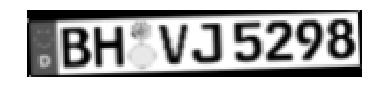

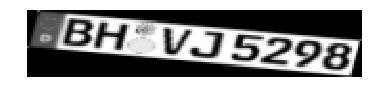

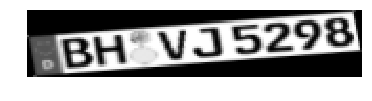

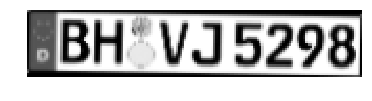

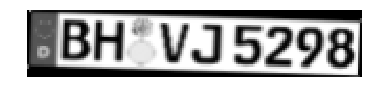

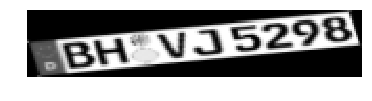

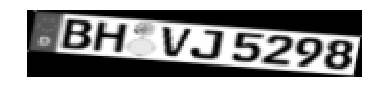

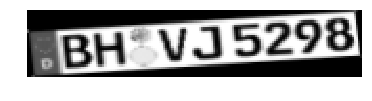

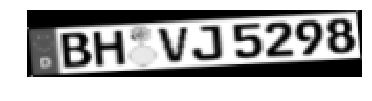

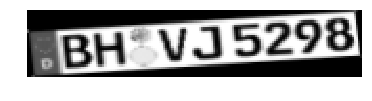

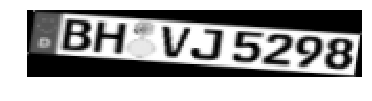

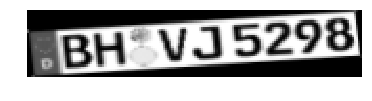

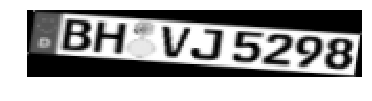

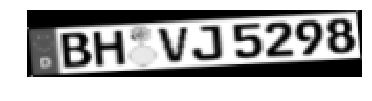

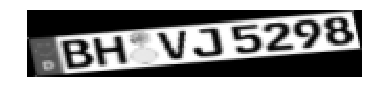

In [11]:
rp = RandomRotatePreprocessor(-10, 10, gray_image.shape[:2][1], gray_image.shape[:2][0])

for i in range(20):
    image = rp.preprocess(gray_image)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()

Preprocessing-Pipeline

=> Reihenfolge abhängig, nicht reversibel

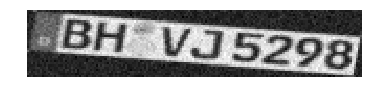

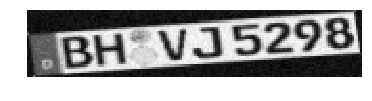

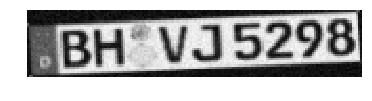

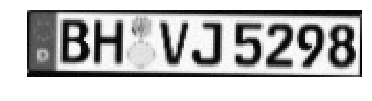

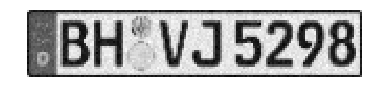

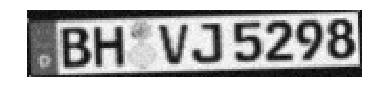

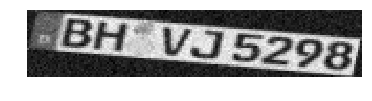

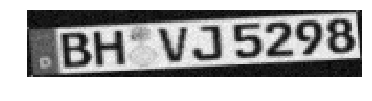

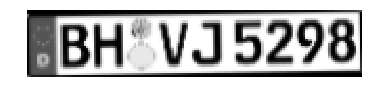

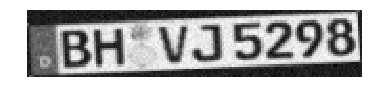

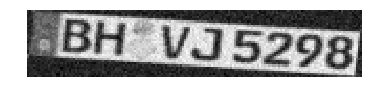

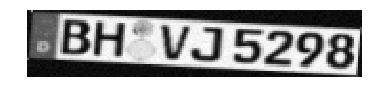

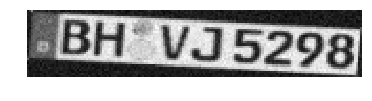

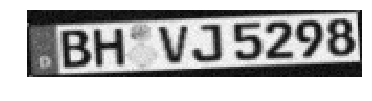

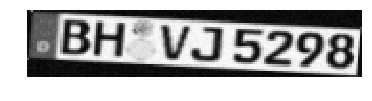

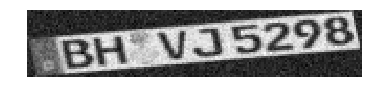

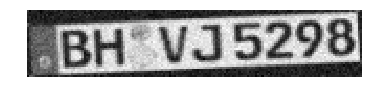

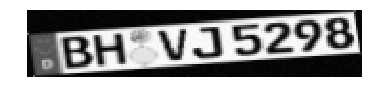

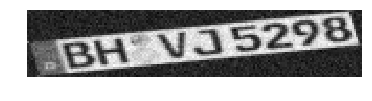

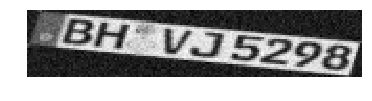

In [12]:
np = RandomGaussianNoisePreprocessor(15)
rp = RandomRotatePreprocessor(-10, 10, gray_image.shape[:2][1], gray_image.shape[:2][0])
  
for i in range(20):
    image = rp.preprocess(gray_image)
    image = np.preprocess(image)
    
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()